In [1]:
import torch
print(torch.__version__)

1.1.0


In [1]:
%matplotlib inline #静态图
#import matplotlib.pyplot as plt
#%matplotlib auto 或 %matplotlib#动态图
#%matplotlib auto

UsageError: unrecognized arguments: #静态图


In [3]:
import torch
import matplotlib.pyplot as plt
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.numpy(), y.numpy())
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        y = F.relu(self.hidden(x))
        y = self.predict(y)
        return y

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

for i in range(100):
    predict = net(x)
    loss = loss_func(predict, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

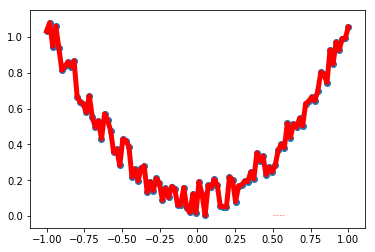

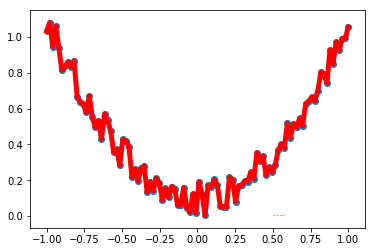

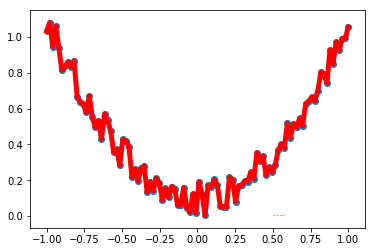

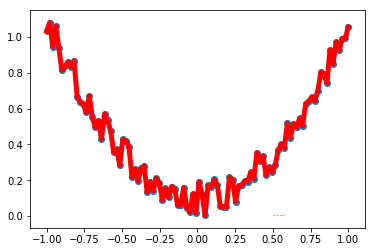

In [8]:
import matplotlib.pyplot as plt
plt.ion()
plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

for t in range(200):
    predict = net(x)
    loss = loss_func(predict, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%50 ==0:
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 2, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()